Створимо набір даних з нашого csv файлу

In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

def getDataset():
    data = pd.read_csv('Export1.csv',sep=';',encoding='cp1252')
    return data

dataset = getDataset()

Перевіримо їх на нормальність

In [148]:
dataset = dataset.drop(dataset.columns[[0, 1, 2, 3, 4, 6]], axis=1)

import scipy.stats as stats
def kolm_smirn_check(dFrame, column):
    ks_statistic, p_value = stats.kstest(dFrame[column], 'norm')
    if p_value > 0.05: return True
    return False

def pearson_check(dFrame, column):
    statistic, p_value = stats.normaltest(dFrame[column])
    if p_value > 0.05: return True
    return False

print("#1 test - Kolmagorov-Smirnov test,\n#2 test - Pearson test\n")
for c in dataset.columns:
    print('{0:<15}'.format(c + ":"),f"#1 test - {kolm_smirn_check(dataset, c)}, #2 test - {pearson_check(dataset, c)};")


#1 test - Kolmagorov-Smirnov test,
#2 test - Pearson test

ratio:          #1 test - False, #2 test - False;
gdp:            #1 test - False, #2 test - False;
population:     #1 test - False, #2 test - False;
sales_of_cigarettes_per_adult_per_day: #1 test - False, #2 test - False;
annual_co2_emissions_tonnes: #1 test - False, #2 test - False;


Перевіримо коефіцієнти корреляції

In [149]:
dataset.corr()

,ratio,gdp,population,sales_of_cigarettes_per_adult_per_day,annual_co2_emissions_tonnes
ratio,1.000000,0.774552,0.137843,-0.047489,0.090640
gdp,0.774552,1.000000,0.243990,-0.167556,0.247694
population,0.137843,0.243990,1.000000,0.045570,0.955826
sales_of_cigarettes_per_adult_per_day,-0.047489,-0.167556,0.045570,1.000000,0.003515
annual_co2_emissions_tonnes,0.090640,0.247694,0.955826,0.003515,1.000000


Розіб'ємо дані на тренувальні та тестові параметри та залежну змінну

In [150]:
from sklearn.model_selection import train_test_split

data = dataset.iloc[:,1:5]
fact = dataset['ratio']
X_train, X_test, Y_train, Y_test = train_test_split(data, fact,test_size = 0.25,random_state = 0)

Лінійна регресія.
Підготуємо всі можливі набори параметрів для моделювання та власне застосуємо лінійну регресію до кожного з них

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X_variant_tuples = ["gdp", "population", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes",
    
                    ["gdp", "population", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"],
                    ["gdp", "population"], ["gdp", "sales_of_cigarettes_per_adult_per_day"], ["gdp", "annual_co2_emissions_tonnes"],
                    ["population", "sales_of_cigarettes_per_adult_per_day"], ["population", "annual_co2_emissions_tonnes"],
                    ["sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"],

                    ["gdp", "population", "sales_of_cigarettes_per_adult_per_day"], 
                    ["gdp", "population","annual_co2_emissions_tonnes"], 
                    ["gdp", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"], 
                    ["population", "sales_of_cigarettes_per_adult_per_day", "annual_co2_emissions_tonnes"]]

linear_regression_models_list = []

for i in range(len(X_variant_tuples)):
    if i < 4: 
        linear_regression_models_list.append(LinearRegression().fit(X_train[X_variant_tuples[i]].to_numpy().reshape(-1,1), Y_train))
    else:
        linear_regression_models_list.append(LinearRegression().fit(X_train[X_variant_tuples[i]], Y_train))
        

Тепер для кожної нашої моделі спроєктуємо передбачення та будемо зберігати його в массиві даних

In [152]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE = []
R2 = []

prediction = []

def predict_by(prediction, s):
    for i in range(len(X_variant_tuples)):
        if i < 4:
            prediction.append(s[i].predict(X_test[X_variant_tuples[i]].to_numpy().reshape(-1,1)))
        else:
            prediction.append(s[i].predict(X_test[X_variant_tuples[i]]))

    return prediction

prediction = predict_by(prediction, linear_regression_models_list)
print(prediction)

[array([0.30055253, 0.23730662, 0.25745379, 0.29168762, 0.22957692,
       0.2273141 , 0.28136563, 0.25161962, 0.19999547, 0.27672129,
       0.25436213, 0.20261434, 0.29698329, 0.25368594, 0.27720082,
       0.27064812, 0.17281835, 0.29464594, 0.20447066, 0.1987499 ,
       0.24845074, 0.29693667, 0.2385931 , 0.27593723, 0.27988533,
       0.24606003, 0.26696026, 0.29189377, 0.25759105, 0.28633219,
       0.23833473, 0.29707851, 0.18865241, 0.198939  , 0.25531339,
       0.19667341, 0.24320802, 0.2542745 , 0.25411423, 0.21622176,
       0.17010838, 0.29991786, 0.26356712, 0.25688644, 0.29162274,
       0.23655898, 0.26615908, 0.22431726, 0.26322603, 0.23545356,
       0.33166011, 0.28692438, 0.16469494, 0.32972123, 0.26730507,
       0.21052278, 0.16942938, 0.31572451, 0.28569374, 0.23780758,
       0.26894609, 0.26881451, 0.27664023, 0.22802073, 0.27226238,
       0.22874924, 0.23779891, 0.30209134, 0.22006535, 0.17234289,
       0.26618578, 0.25531743, 0.25518279, 0.20224889, 0.1704

Для кожного з передбачень обрахуємо MSE та R2.
Для MSE побудужмо графік для наочності та аби зрозуміти, яка сама модель є ефективнішою

[0.0015067597287360514, 0.003852151494575099, 0.004026399727361655, 0.003874289757312367, 0.0013026028278516732, 0.0014833530593858168, 0.0014526232611095815, 0.0014306078219743733, 0.004008792266713763, 0.003795901989735636, 0.004022878500132977, 0.0014218584023596168, 0.0013379169285308683, 0.001371339445990647, 0.003954269999128051]


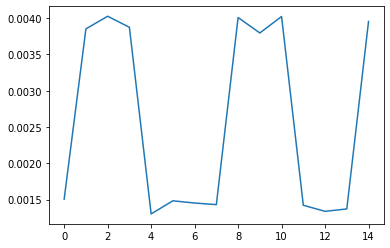

In [153]:
for i in range(len(prediction)):
    MSE.append(mean_squared_error(Y_test,prediction[i]))
    R2.append(r2_score(Y_test,prediction[i]))

import matplotlib.pyplot as plt
print(MSE)
#plt.plot(R2)
plt.plot(MSE)
plt.show()

Програмно порахуємо та визначимо, яка модель є найкращою

In [154]:
indexMinMSE = np.sum((np.array(prediction)- Y_test.to_numpy())**2,axis = 1).argmin()
MinMSE = np.sum((np.array(prediction) - Y_test.to_numpy())**2, axis = 1)
#print(MinMSE)
#print(indexMinMSE)
print("Best model is:")
print(f"linear model by {X_variant_tuples[indexMinMSE]} params")

Best model is:
linear model by ['gdp', 'population', 'sales_of_cigarettes_per_adult_per_day', 'annual_co2_emissions_tonnes'] params


In [155]:
from sklearn.linear_model import LogisticRegression

Тепер, знаючи, яка модель є найкращою, за допомогою кастомної функції, продемонструємо графік Learning Curve

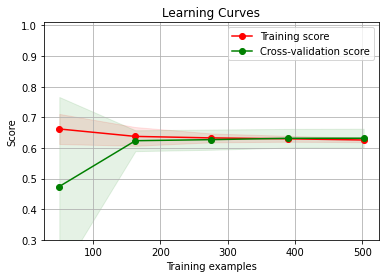

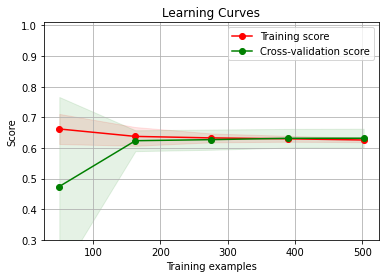

In [156]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(linear_regression_models_list[4], "Learning Curves", X_train, Y_train, (0.3, 1.01), cv=cv, n_jobs=4)
plt.show()
plot_learning_curve(linear_regression_models_list[12], "Learning Curves", X_train, Y_train, (0.3, 1.01), cv=cv, n_jobs=4)
plt.show()

Random Forest Regression.
Для кожного кортежу застосуємо дану модель

In [157]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regression_model_list = []

#model = RandomForestRegressor(n_estimators=500, max_features=5).fit(X,y)

for i in range(len(X_variant_tuples)):
    if i < 4: 
        random_forest_regression_model_list.append(RandomForestRegressor(n_estimators=300, max_features=5).fit(X_train[X_variant_tuples[i]].to_numpy().reshape(-1,1), Y_train))
    else:
        random_forest_regression_model_list.append(RandomForestRegressor(n_estimators=300, max_features=5).fit(X_train[X_variant_tuples[i]], Y_train))
        

In [158]:
random_forest_prediction = []
random_forest_prediction = predict_by(random_forest_prediction, random_forest_regression_model_list)
print(random_forest_prediction)

[array([0.32748923, 0.23876136, 0.27934898, 0.27473835, 0.22253633,
       0.25602695, 0.26589174, 0.24609618, 0.15508459, 0.29366772,
       0.27824906, 0.14912599, 0.3143363 , 0.28774032, 0.306123  ,
       0.30945141, 0.13816426, 0.30865336, 0.18794307, 0.15602302,
       0.26811278, 0.3143363 , 0.26692144, 0.29731066, 0.28674567,
       0.23500895, 0.27160829, 0.31438634, 0.27983644, 0.2777341 ,
       0.26032382, 0.32272924, 0.15053675, 0.15986831, 0.28902692,
       0.20215249, 0.26603384, 0.27193657, 0.26378557, 0.20505134,
       0.1865337 , 0.31762691, 0.30266791, 0.2355739 , 0.27479674,
       0.27678448, 0.28665691, 0.19924578, 0.24459417, 0.23376163,
       0.26570853, 0.27005431, 0.14484131, 0.26991949, 0.26384924,
       0.2173947 , 0.1531491 , 0.30713419, 0.27451338, 0.26809889,
       0.27731063, 0.28747503, 0.27258487, 0.27518153, 0.30607232,
       0.27807313, 0.26809889, 0.26457215, 0.24612638, 0.14258776,
       0.28697227, 0.28902692, 0.29146703, 0.19845467, 0.1352

[0.001294564483958602, 0.003354323194195433, 0.004753095797162104, 0.0032931288823355095, 0.0002687797586978412, 0.0004120805785645654, 0.0007718860342712186, 0.0005094017845034083, 0.0015903479250986262, 0.0009055071158951822, 0.0020627567024578647, 0.00028993587515764596, 0.0003198079090616548, 0.00039791937520468996, 0.0007061143045926425]


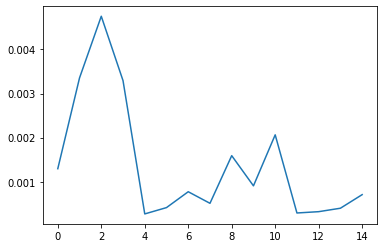

In [159]:
MSE_forest = []
R2_forest = []
for i in range(len(random_forest_prediction)):
    MSE_forest.append(mean_squared_error(Y_test,random_forest_prediction[i]))
    R2_forest.append(r2_score(Y_test,random_forest_prediction[i]))

print(MSE_forest)
#plt.plot(R2)
plt.plot(MSE_forest)
plt.show()

In [160]:
indexMinMSE_forest = np.sum((np.array(random_forest_prediction)- Y_test.to_numpy())**2,axis = 1).argmin()
MinMSE_forest = np.sum((np.array(random_forest_prediction) - Y_test.to_numpy())**2, axis = 1)
#print(MinMSE)
print(indexMinMSE)
print("Best model is:")
print(f"Random Forest model by {X_variant_tuples[indexMinMSE_forest]} params")

4
Best model is:
Random Forest model by ['gdp', 'population', 'sales_of_cigarettes_per_adult_per_day', 'annual_co2_emissions_tonnes'] params


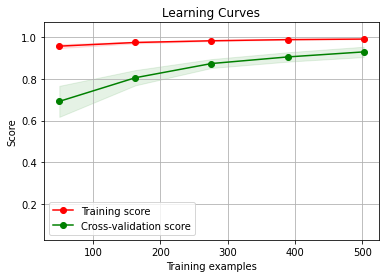

In [162]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(random_forest_regression_model_list[4], "Learning Curves", X_train, Y_train, (0.03, 1.07), cv=cv, n_jobs=4)
plt.show()